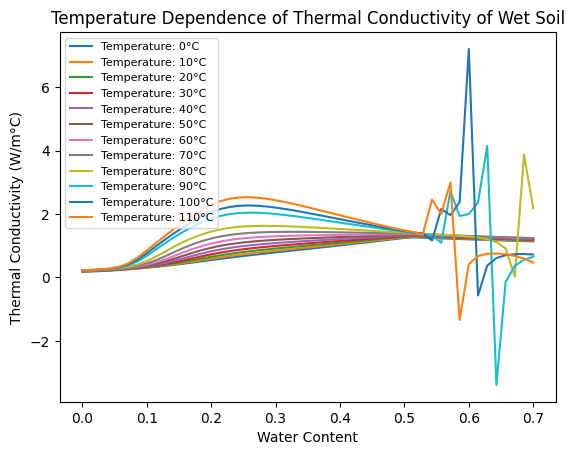

In [9]:
#4.1
#from math import exp
import matplotlib.pyplot as plt
import numpy as np
from PSP_heat import *
from PSP_thermalCond import *
from PSP_soil import *
from math import *
# Define parameters
bulkDensity = 1300  # kg/m^3
clay = 0.4  # Assume clay content of soil
waterContents = np.linspace(0, 0.7, 50)  # Vary water content from 0 to 70%
temperatures = range(0, 120, 10)  # Temperature range from 0°C to 110°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water Content')
plt.ylabel('Thermal Conductivity (W/m°C)')
plt.title('Temperature Dependence of Thermal Conductivity of Wet Soil')
plt.legend(fontsize='8')
plt.grid(False)
plt.show()

#4.1 At what temperature is the thermal conductivity of wet soil independent of water content?
When the temperature above 70°C then the thermal conductivity of wet soil is independent of water content. According to  thermal conductivity model, at about 65 C, the apparent thermal conductivity from latent heat transport is equal to the thermal conductivity of water, so increasing water content does not affect the soil conductivity, at water content above 0.3 m3 m–3.

In [17]:
#4.2

#Defining variables based on chapter 2 (page 23) for Db_min, Db_max, and Dp

#Note: Ch is strongly dependent on volumetric water content 

Db_min = 1000     # assuming minimum bulk density value[Kg/m3]

Db_max = 1600     # assuming maximum bulk density value [Kg/m3]

Dp = 2650         # assuming particle density value (from quartz) [Kg/m3]

Cs = 2.4e6        # volumetric_heat_capacity of solids [J/m3/K]
                  # usual value for mineral soils (from Table 4.1 -p. 65)

Cl = 4.18e6       # volumetric_heat_capacity of liquid [J/m3/K]
                  # from Table 4.1 -p. 65

#Formulas
#from equation 2.19

φf_Dbmin = 1 - (Db_min/Dp)    # total porosity with minimum bulk density 
φf_Dbmax = 1 - (Db_max/Dp)    # total porosity with maximum bulk density 

#from equation 2.25
Sf_Dbmin = 1 - φf_Dbmin       # volume_fraction of solids with minimum bulk density  
Sf_Dbmax = 1 - φf_Dbmax       # volume_fraction of solids with maximum bulk density  

Lf_Dbminsat = φf_Dbmin        # volume fraction of liquid with minimum bulk density at saturation [m3/m3] 
Lf_Dbmaxsat = φf_Dbmax        # volume fraction of liquid with maximum bulk density at saturation [m3/m3]

Lf_Dbmin10 = φf_Dbmin * 0.1   # volume fraction of liquid with minimum bulk density at 10% volumetric water content [m3/m3]
Lf_Dbmax10 = φf_Dbmax * 0.1   # volume fraction of liquid with maximum bulk density at 10% volumetric water content [m3/m3]

#In mineral soil the contribution of soil air to heat capacity and from organic matter is also often negligible 

#Calculation of Ch for each soil with different Db and volumetric water content values

Ch_Dbminsat = Cs * Sf_Dbmin + Cl * Lf_Dbminsat    # total volumetric_heat_capacity of soil with minimum bulk density at saturation [J/m3/K]
Ch_Dbmaxsat = Cs * Sf_Dbmax + Cl * Lf_Dbmaxsat    # total volumetric_heat_capacity of soil with maximum bulk density at saturation [J/m3/K]
Ch_Dbmin10 = Cs * Sf_Dbmin + Cl * Lf_Dbmin10      # total volumetric_heat_capacity of soil with minimum bulk density at 10% volumetric water content [J/m3/K]
Ch_Dbmax10 = Cs * Sf_Dbmax + Cl * Lf_Dbmax10      # total volumetric_heat_capacity of soil with maximum bulk density at 10% volumetric water content [J/m3/K]

print ('%E' % (Ch_Dbminsat), ' = maximum Ch value')
print ('%E' % (Ch_Dbmaxsat))
print ('%E' % (Ch_Dbmin10), ' = minimum Ch value')
print ('%E' % (Ch_Dbmax10))


3.508302E+06  = maximum Ch value
3.105283E+06
1.165925E+06  = minimum Ch value
1.614679E+06


The volumetric specific heat of soil ranges from 1.16 being minimum to 3.50 being maximum

Temperatures =  [20.3, 20.4, 19.8, 18.0]


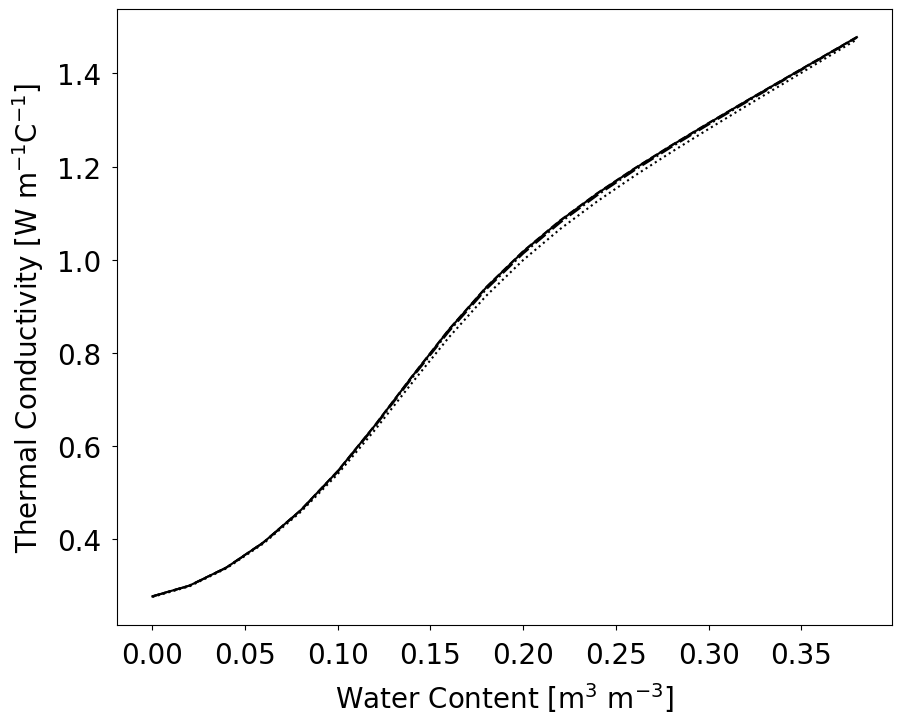

soil temp at 10 cm 20.3
soil temp at 25 cm 20.4


In [48]:
#4.5
from PSP_thermalCond import *
bulkDensity = 1600 # "bulk density [kg/m^3]: "
clay = 0.3 # "clay [0 - 1]: "

A, isFileOk = readDataFile("soilTemperatures_hours.csv", 1, ',', False)

soilTemperature = [A[0][1],A[0][2],A[0][3],A[0][4]] #10 25 70 135 cm
print ("Temperatures = ", soilTemperature)
nrTemperatures = len(soilTemperature)

particleDensity = 2650
porosity = 1 - (bulkDensity / particleDensity) 

step = 0.02  
nrValues = int(porosity / step) + 1
waterContent = np.zeros(nrValues)
thermalConductivitys = np.zeros(nrValues)  ###########after an hour. rename this as it is the name of the command as well
for i in range(nrValues):
    waterContent[i] = step*i


fig = plt.figure(figsize=(10,8))
plt.xlabel('Water Content [m$^{3}$ m$^{-3}$]',fontsize=20,labelpad=8)
plt.ylabel('Thermal Conductivity [W m$^{-1}$C$^{-1}$]',fontsize=20,labelpad=8,)
plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
#plt.xlim(0, 0.7)
for t in range(nrTemperatures):
    for i in range(nrValues):
        thermalConductivitys[i] = thermalConductivity(bulkDensity, waterContent[i], clay, soilTemperature[t])
    if (t == 0): plt.plot(waterContent, thermalConductivitys,'k')  
    if (t == 1): plt.plot(waterContent, thermalConductivitys,'--k')   
    if (t == 2): plt.plot(waterContent, thermalConductivitys,'-.k') 
    if (t == 3): plt.plot(waterContent, thermalConductivitys,':k')
plt.show() 
print ('soil temp at 10 cm', soilTemperature[0])
print ('soil temp at 25 cm' , soilTemperature[1])









Text(0, 0.5, 'Depth [m]')

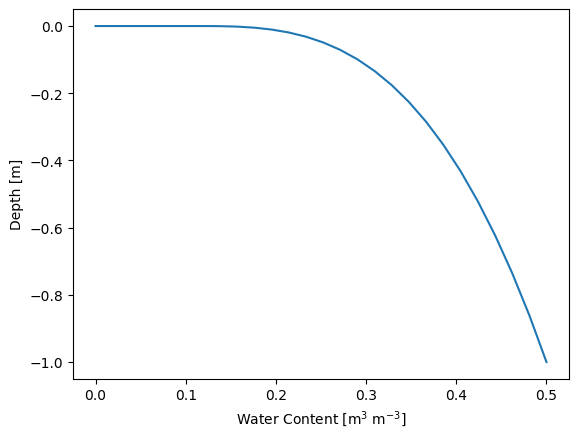

In [10]:
#4.4
def initialize(T_0, thetaIni, solver):
    global z, dz, zCenter, vol, wc, T, oldT
    # vector depth [m]
    z = grid.geometric(n, 1.0)
  
    vol[0] = 0
    for i in range(n+1): 
        dz[i] = z[i+1]-z[i]
        if (i > 0): vol[i] = area * dz[i]
    for i in range(n+2): 
        zCenter[i] = z[i] + dz[i]*0.5
        
    if (solver == CELL_CENT_FIN_VOL):
        for i in range(n+1): 
            dz[i] = zCenter[i+1]-zCenter[i]
                 
    for i in range(1, n+2):
        T[i] = T_0
        oldT[i] = T_0
        wc[i] = thetaIni[i]               #Set water content with depth
    return z

def finiteDifference(airT, boundaryT, dt, factor):
    g = 1.0 - factor
    energyBalance = 1.
    for i in range(1, n+2):
        T[i] = oldT[i]
    nrIterations = 0
    while ((energyBalance > tolerance) and (nrIterations < maxNrIterations)):
        for i in range(1, n+2):
            #lambda_[0]= 20.
            lambda_[i] = thermalConductivity(bulkDensity, wc[i], clay, T[i])
            #print('Ktherm = ', lambda_[i])
            C_T[i] = heatCapacity(bulkDensity, wc[i])*vol[i]
        f[0] = 0.
        for i in range(1, n+1):
            f[i]=area* lambda_[i] / dz[i]
        for i in range(1, n+1):    
            if (i == 1):
                a[i] = 0.
                b[i] = 1.
                c[i] = 0.
                d[i] = airT
            elif (i < n):
                a[i] = -f[i-1]*factor
                b[i] = C_T[i]/dt + f[i-1]*factor + f[i]*factor
                c[i] = -f[i]*factor
                d[i] = C_T[i]/dt * oldT[i] +(1.-factor)*(f[i-1]*oldT[i-1]+f[i]
                                            *oldT[i+1]-(f[i-1]+f[i])*oldT[i])
            elif (i == n):
                a[n] = 0.
                b[n] = 1.
                c[n] = 0.
                d[n] = boundaryT 
        ThomasBoundaryCondition(a, b, c, d, T, 1, n)
        dSum = 0
        for i in range(2, n):
            dSum += C_T[i]*(T[i]-oldT[i])
        energyBalance = (abs(dSum - factor*dt*(f[1]*(T[1]-T[2]) 
                    - f[n-1]*(T[n-1]-boundaryT)) - g*dt*(f[1]*(oldT[1]-oldT[2]) 
                    - f[n-1]*(oldT[n-1]-boundaryT))))
        nrIterations += 1
        
    if (energyBalance < tolerance):
        flux = f[1]*(T[1]-T[2])
        return True, nrIterations, flux
    else:
        return False, nrIterations, 0

area = 1                    	
maxNrIterations = 100
tolerance = 1.e-2               
T_0 = 25                                  #Assumed initial temperature
n = 20                        
z = np.zeros(n+2, float)  
zCenter = np.zeros(n+2, float)      
dz = np.zeros(n+2, float)       
vol = np.zeros(n+2, float)     
wc = np.zeros(n+2, float)       
a = np.zeros(n+2, float)        
b = np.zeros(n+2, float)        
c = np.zeros(n+2, float)        
d = np.zeros(n+2, float)       

T = np.zeros(n+2, float)      
dT = np.zeros(n+2, float)       
oldT = np.zeros(n+2, float)     
C_T = np.zeros(n+2, float)     
lambda_ = np.zeros(n+2, float)  
k_mean = np.zeros(n+2, float)   
f = np.zeros(n+2, float)       
solver = 2
thetaIni = np.linspace(0.1, 0.5, n+2)  

initialize(T_0, thetaIni, solver)
hours = 72
finiteDifference(T_0, 20, hours *3600, 2 )
plt.figure
plt.plot(wc,-z)
plt.xlabel('Water Content [m$^{3}$ m$^{-3}$]')
plt.ylabel('Depth [m]')

In [15]:
#4.6
from math import exp
import matplotlib.pyplot as plt
import numpy as np
from PSP_soil import*
Db= [1500,900] #compacted and tilted soil
clay= [0.1,0.4,0.7] 
theta = 0.3
temp = 25
for i in Db:
    for j in clay:
        K = thermalConductivity(i, theta, j, temp)
        print('bulk density = ', i, ' clay = ', j, ' conductivity = ', K) 

bulk density =  1500  clay =  0.1  conductivity =  1.1905622999739145
bulk density =  1500  clay =  0.4  conductivity =  1.1806354495256233
bulk density =  1500  clay =  0.7  conductivity =  1.1213825252006733
bulk density =  900  clay =  0.1  conductivity =  0.6278320949527835
bulk density =  900  clay =  0.4  conductivity =  0.6140934984325185
bulk density =  900  clay =  0.7  conductivity =  0.5352751195379998
